In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from google.colab import drive
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
filterwarnings("ignore")

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("drive/MyDrive/Machine Learning/temperature.csv")
data

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Kita pilih Negara Albuquerque dalam hal ini, karena memiliki data kosong 1
data.isnull().sum()

datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [5]:
data = data[["datetime", "Albuquerque"]]
data

,datetime,Albuquerque
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,285.120000
2,2012-10-01 14:00:00,285.154558
3,2012-10-01 15:00:00,285.233952
4,2012-10-01 16:00:00,285.313345
...,...,...
45248,2017-11-29 20:00:00,285.720000
45249,2017-11-29 21:00:00,286.450000
45250,2017-11-29 22:00:00,286.440000
45251,2017-11-29 23:00:00,286.140000


In [6]:
# Karena ada data yang kosong, kita akan mengisinya dengan nilai rata2 yang ada di kota tersebut
# Rata-rata = 285.617856
data["Albuquerque"][(data["Albuquerque"].isnull() == True)] = 285.617856
data.isnull().sum()

datetime       0
Albuquerque    0
dtype: int64

In [7]:
data

,datetime,Albuquerque
0,2012-10-01 12:00:00,285.617856
1,2012-10-01 13:00:00,285.120000
2,2012-10-01 14:00:00,285.154558
3,2012-10-01 15:00:00,285.233952
4,2012-10-01 16:00:00,285.313345
...,...,...
45248,2017-11-29 20:00:00,285.720000
45249,2017-11-29 21:00:00,286.450000
45250,2017-11-29 22:00:00,286.440000
45251,2017-11-29 23:00:00,286.140000


In [8]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

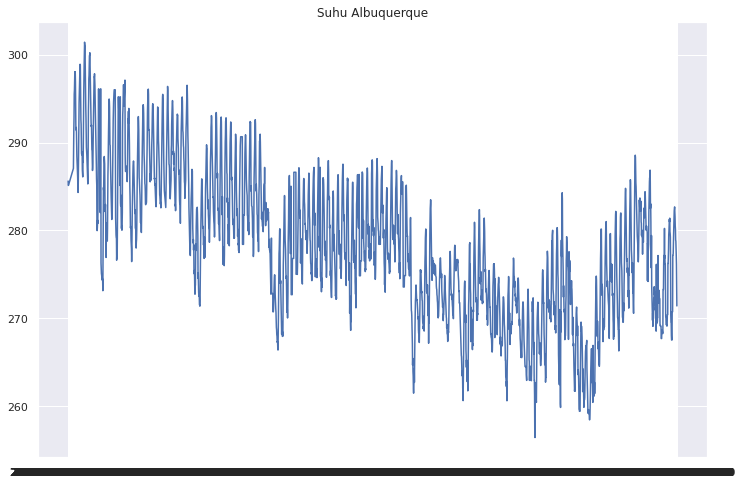

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(X[:3000], y[:3000]) # Menggunakan batas sampai baris 3000, karena GPU google colabs sudah limit
plt.title("Suhu Albuquerque")
plt.show()

In [10]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  
  return ds.batch(batch_size).prefetch(1)

In [19]:
skala = MinMaxScaler()
skala.fit(y.reshape(-1,1))
y = skala.transform(y.reshape(-1,1))

In [20]:
train = windowed_dataset(y.flatten(), window_size=30, batch_size=128, shuffle_buffer=1000)
model = Sequential([
      layers.LSTM(60, return_sequences=True),
      layers.LSTM(60),
      layers.Dense(10, activation="relu"),
      layers.Dense(10, activation="relu"),
      layers.Dense(1),
])

In [21]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=["mae"]
)

In [23]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<0.10):
            print("\nMAE sudah mencapai minim < 10%!")
            self.model.stop_training = True
callbacks = myCallback()

In [25]:
history = model.fit(train, epochs=100, callbacks=[callbacks])

Epoch 1/100
354/354 [==============================] - 6s 17ms/step - loss: 0.0107 - mae: 0.1212
Epoch 2/100
354/354 [==============================] - 6s 17ms/step - loss: 0.0106 - mae: 0.1204
Epoch 3/100
354/354 [==============================] - 6s 17ms/step - loss: 0.0105 - mae: 0.1195
Epoch 4/100
354/354 [==============================] - 6s 17ms/step - loss: 0.0103 - mae: 0.1187
Epoch 5/100
354/354 [==============================] - 6s 17ms/step - loss: 0.0102 - mae: 0.1178
Epoch 6/100
354/354 [==============================] - 6s 17ms/step - loss: 0.0100 - mae: 0.1169
Epoch 7/100
354/354 [==============================] - 6s 17ms/step - loss: 0.0099 - mae: 0.1161
Epoch 8/100
354/354 [==============================] - 8s 21ms/step - loss: 0.0097 - mae: 0.1152
Epoch 9/100
354/354 [==============================] - 7s 19ms/step - loss: 0.0096 - mae: 0.1142
Epoch 10/100
354/354 [==============================] - 9s 24ms/step - loss: 0.0094 - mae: 0.1133
Epoch 11/100
354/354 [=======

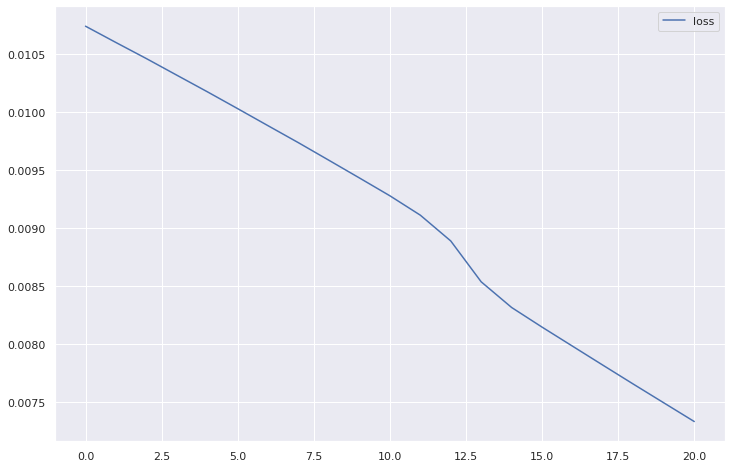

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.show()